In [6]:
# Import libraries necessary for this project

#NumPy - Scientific Computing with Python: http://www.numpy.org/
import numpy as np

#Matplotlib - Python plotting: http://matplotlib.org/
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
#import matplotlib.cm

#SciKit-Image - Image Processing in Python: http://scikit-image.org/
#import skimage.data
#import skimage.filters
#import skimage.io
import skimage.morphology as mph
#import skimage.color

#SciKit-Video - Video Processing in Python: http://www.scikit-video.org
import skvideo.io

#Itertools - Efficient Looping in Python: https://docs.python.org/2/library/itertools.html
from itertools import islice



In [11]:
videoarray = skvideo.io.vread('data/improved_videos/training4.avi')

In [12]:
videoarray.shape

(5050, 144, 256, 3)

In [13]:
t_array=videoarray[:,:,:,0]
t_array.shape

(5050, 144, 256)

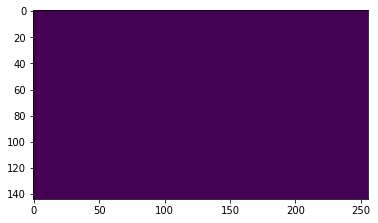

In [17]:
plt.imshow(t_array[23,:,:])

In [18]:
X = np.transpose(np.nonzero(t_array[10,:,:]))

In [19]:
X

array([], shape=(0, 2), dtype=int64)

In [32]:
X.shape

(18782, 2)

In [56]:
db = DBSCAN(eps=2, min_samples=10).fit(X)

In [57]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 38


MemoryError: 

In [58]:
labels

array([-1, -1, -1, ...,  0, -1, -1])

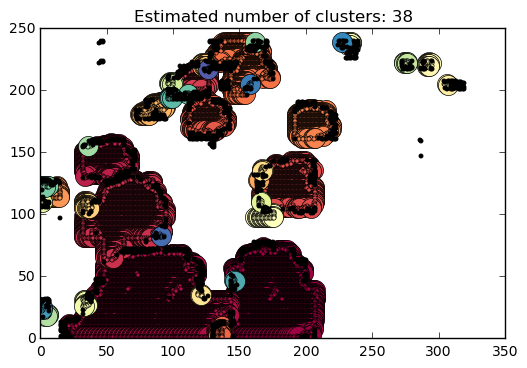

In [76]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], t_array.shape[1]-xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], t_array.shape[1]-xy[:, 0], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()